## **WSN Dataset Project**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler # For standardizing numerical features
from sklearn.linear_model import LogisticRegression # Example machine learning model

### **STEP # 1**

# **Load Dataset**

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WSN-DS.csv')

In [ ]:
dataset

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Consumed Energy,label
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


# **Explore Dataset**

In [ ]:
# Print the first five rows of the DataFrame.
print(dataset.head())

       id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0  101000     50       1   101000      0.00000       1       0        0   
1  101001     50       0   101044     75.32345       0       4        1   
2  101002     50       0   101010     46.95453       0       4        1   
3  101003     50       0   101044     64.85231       0       4        1   
4  101004     50       0   101010      4.83341       0       4        1   

    JOIN_R   SCH_S   SCH_R  Rank   DATA_S   DATA_R   Data_Sent_To_BS  \
0       25       1       0     0        0     1200                48   
1        0       0       1     2       38        0                 0   
2        0       0       1    19       41        0                 0   
3        0       0       1    16       38        0                 0   
4        0       0       1    25       41        0                 0   

    dist_CH_To_BS   send_code   Consumed Energy   label  
0       130.08535            0          2.46940  Normal  


In [ ]:
# Print the shape of the DataFrame.
print(dataset.shape)

(374661, 19)


In [ ]:
# Print the column names of the DataFrame.
print(dataset.columns)

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Consumed Energy',
       'label'],
      dtype='object')


In [ ]:
# Print the data types of each column.
print(dataset.dtypes)

 id                   int64
 Time                 int64
 Is_CH                int64
 who CH               int64
 Dist_To_CH         float64
 ADV_S                int64
 ADV_R                int64
 JOIN_S               int64
 JOIN_R               int64
 SCH_S                int64
 SCH_R                int64
Rank                  int64
 DATA_S               int64
 DATA_R               int64
 Data_Sent_To_BS      int64
 dist_CH_To_BS      float64
 send_code            int64
Consumed Energy     float64
label                object
dtype: object


In [ ]:
# Print the summary statistics of the DataFrame.
print(dataset.describe())

                 id           Time          Is_CH        who CH  \
count  3.746610e+05  374661.000000  374661.000000  3.746610e+05   
mean   2.749693e+05    1064.748712       0.115766  2.749804e+05   
std    3.898986e+05     899.646164       0.319945  3.899112e+05   
min    1.010000e+05      50.000000       0.000000  1.010000e+05   
25%    1.070930e+05     353.000000       0.000000  1.070960e+05   
50%    1.160710e+05     803.000000       0.000000  1.160720e+05   
75%    2.150720e+05    1503.000000       0.000000  2.150730e+05   
max    3.402096e+06    3600.000000       1.000000  3.402100e+06   

          Dist_To_CH          ADV_S          ADV_R         JOIN_S  \
count  374661.000000  374661.000000  374661.000000  374661.000000   
mean       22.599380       0.267698       6.940562       0.779905   
std        21.955794       2.061148       7.044319       0.414311   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.735440       0.000000       3.000000 

In [ ]:
# Check for duplicate rows
dataset.duplicated().sum()

8873

In [ ]:
# Check for null values in each column
dataset.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Consumed Energy     0
label               0
dtype: int64

# **SPLIT Dataset to consider 30% for training**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `dataset` is your pandas DataFrame and 'label' is the column name for class labels

# Step 1: Split the dataset into 2 equal parts
part1, temp_part = train_test_split(
    dataset,
    test_size=0.5,
    stratify=dataset['label']
)

# Step 2: Split the temporary part into 2 equal parts again
part2, part3 = train_test_split(
    temp_part,
    test_size=0.5,
    stratify=temp_part['label']
)

# Step 3: Split one of the resulting parts into 2 equal parts again
part3, part4 = train_test_split(
    part3,
    test_size=0.5,
    stratify=part3['label']
)

# Verify the distribution
print("Part 1 class distribution:\n", part1['label'].value_counts())
print("Part 2 class distribution:\n", part2['label'].value_counts())
print("Part 3 class distribution:\n", part3['label'].value_counts())
print("Part 4 class distribution:\n", part4['label'].value_counts())

Part 1 class distribution:
 label
Normal       170033
Grayhole       7298
Blackhole      5024
TDMA           3319
Flooding       1656
Name: count, dtype: int64
Part 2 class distribution:
 label
Normal       85016
Grayhole      3649
Blackhole     2512
TDMA          1660
Flooding       828
Name: count, dtype: int64
Part 3 class distribution:
 label
Normal       42508
Grayhole      1824
Blackhole     1257
TDMA           830
Flooding       414
Name: count, dtype: int64
Part 4 class distribution:
 label
Normal       42509
Grayhole      1825
Blackhole     1256
TDMA           829
Flooding       414
Name: count, dtype: int64


# **Balance Dataset**

In [ ]:
# Balance the dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
# Define the oversampling and undersampling techniques
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WSN-DS.csv')

In [ ]:
# Separate features and labels
X_train = dataset.drop("label", axis=1)
y_train = dataset["label"]

In [ ]:
# Separate features and labels
X_train = dataset.drop("label", axis=1)
y_train = dataset["label"]

In [ ]:
# Oversample the minority class
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Undersample the majority class
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_oversampled, y_train_oversampled)

In [ ]:
# Print the class distribution of the balanced training set
print("Balanced training set class distribution:\n", y_train_balanced.value_counts())

Balanced training set class distribution:
 label
Blackhole    340066
Flooding     340066
Grayhole     340066
Normal       340066
TDMA         340066
Name: count, dtype: int64


# **Preprocess the data (Handling Outliers and Missing values)**

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
# Check for missing values
missing_values = dataset.isnull().sum()
print(missing_values)

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Consumed Energy     0
label               0
dtype: int64


In [ ]:
# Handle missing values (e.g., impute with mean or median)
dataset[" Is_CH"].fillna(dataset[" Is_CH"].mean(), inplace=True)

In [ ]:
# Get the column you want to check for outliers
column_name = "Consumed Energy"

In [ ]:
# Check for outliers using z-score
z_scores = stats.zscore(dataset[column_name])
outliers_zscore = dataset[abs(z_scores) > 3]

In [ ]:
# Handle outliers using IQR method
Q1 = dataset[column_name].quantile(0.25)
Q3 = dataset[column_name].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dataset = dataset[(dataset[column_name] >= lower_bound) & (dataset[column_name] <= upper_bound)]

In [ ]:
# Print the outliers detected by each method
print("Outliers detected by z-score method:")
print(outliers_zscore)

Outliers detected by z-score method:
            id   Time   Is_CH   who CH   Dist_To_CH   ADV_S   ADV_R   JOIN_S  \
0       101000     50       1   101000      0.00000       1       0        0   
10      101010     50       1   101010      0.00000       1       0        0   
31      101031     50       1   101031      0.00000       1       0        0   
44      101044     50       1   101044      0.00000       1       0        0   
181     102081    100       1   102081      0.00000       1       1        0   
...        ...    ...     ...      ...          ...     ...     ...      ...   
374494  119032    953       1   119032      0.00000       1       6        0   
374543  119081    953       1   119081      0.00000       1       6        0   
374550  119088    953       1   119088      0.00000       1       6        0   
374551  119089    953       1   119089      0.00000       1       6        0   
374622  201061   1003       0   201037     29.54568       0       5        1   

  

In [ ]:
# Check for inconsistencies and resolve them
dataset = dataset.drop_duplicates()

# **Analyze Class Distribution**

In [ ]:
class_counts = dataset['label'].value_counts()
print(class_counts)

label
Normal       282896
Grayhole      10687
Blackhole      8994
TDMA           4864
Flooding       1162
Name: count, dtype: int64


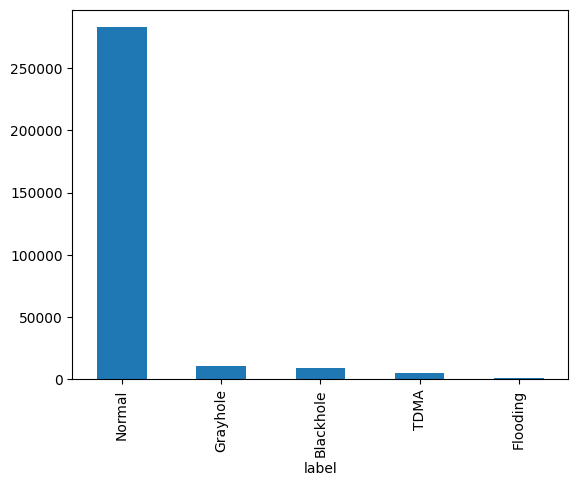

In [ ]:
# Visualize class distribution with a bar chart
class_counts.plot(kind='bar')
plt.show()

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
dataset_majority = dataset[dataset['label'] == 'majority_class']
dataset_minority = dataset[dataset['label'] == 'minority_class']

# Upsample minority class
dataset_minority_upsampled = resample(
    dataset_minority,
    replace=True,  # sample with replacement
    n_samples=len(dataset_majority),  # match the majority class size
    random_state=123  # random seed for reproducibility
)

# Combine majority and upsampled minority classes
dataset_balanced = pd.concat([dataset_majority, dataset_minority_upsampled])

# Shuffle the rows to ensure random distribution of classes
dataset_balanced = dataset_balanced.sample(frac=1, random_state=123)

# Print the count of each class
print(dataset_balanced['label'].value_counts())

Series([], Name: count, dtype: int64)


## **STEP # 02**

In [ ]:
# - Analyze categorical features
for col in dataset.select_dtypes(include='object'):
    print(f"Unique values for '{col}':")
    print(dataset[col].value_counts())

Unique values for 'label':
label
Normal       282896
Grayhole      10687
Blackhole      8994
TDMA           4864
Flooding       1162
Name: count, dtype: int64


In [ ]:
# - Analyze numerical features
for col in dataset.select_dtypes(include=['int64', 'float64']):
    print(f"Distribution of '{col}':")
    print(dataset[col].describe())
    print(dataset[col].skew())
    print(dataset[col].kurtosis())

Distribution of ' id':
count    3.086030e+05
mean     2.557208e+05
std      3.801171e+05
min      1.010000e+05
25%      1.070640e+05
50%      1.150610e+05
75%      2.100040e+05
max      3.402096e+06
Name:  id, dtype: float64
4.514917553176928
23.464317308366102
Distribution of ' Time':
count    308603.000000
mean       1008.044578
std         867.395825
min          50.000000
25%         353.000000
50%         753.000000
75%        1403.000000
max        3600.000000
Name:  Time, dtype: float64
1.2163397544891146
0.6876601913968736
Distribution of ' Is_CH':
count    308603.000000
mean          0.086224
std           0.280695
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name:  Is_CH, dtype: float64
2.9482430652673286
6.692180542661675
Distribution of ' who CH':
count    3.086030e+05
mean     2.557287e+05
std      3.801292e+05
min      1.010000e+05
25%      1.070670e+05
50%      1.150630e+05
75%      2.100030e+05
max   

## **Visualize data**

## **Box Plot**

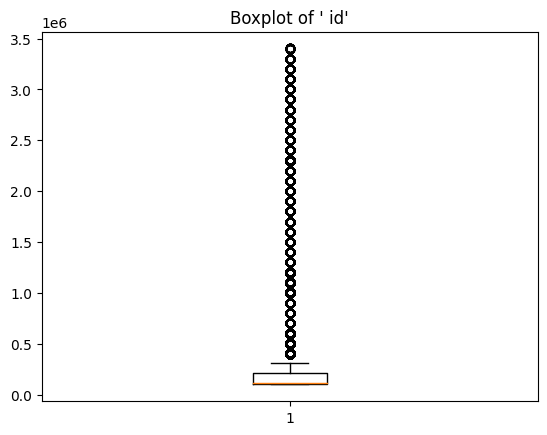

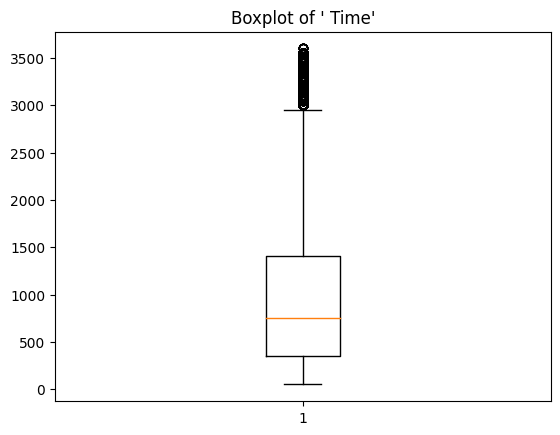

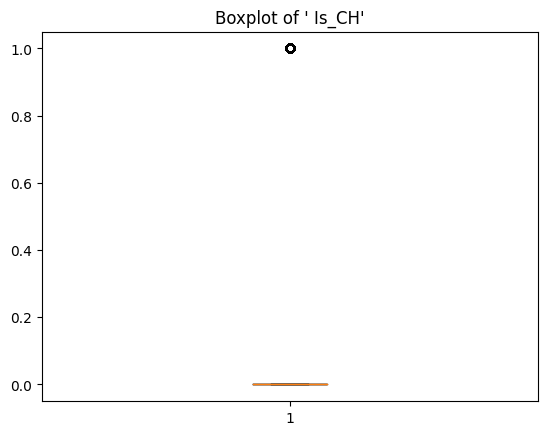

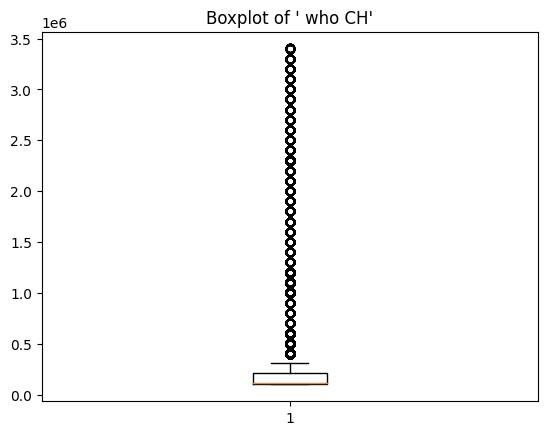

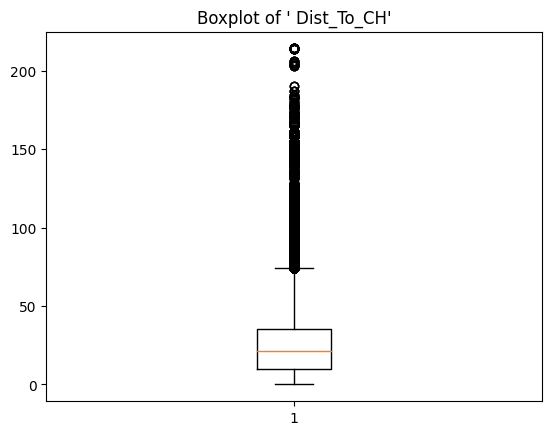

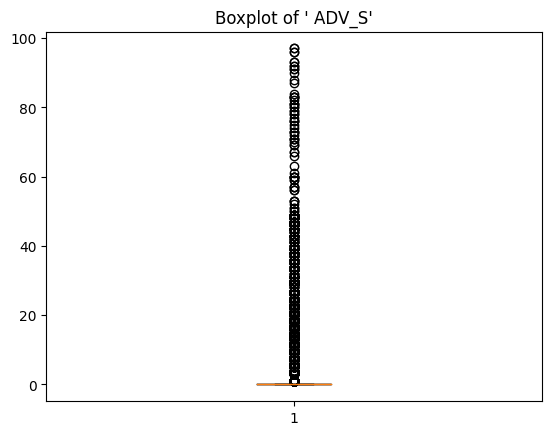

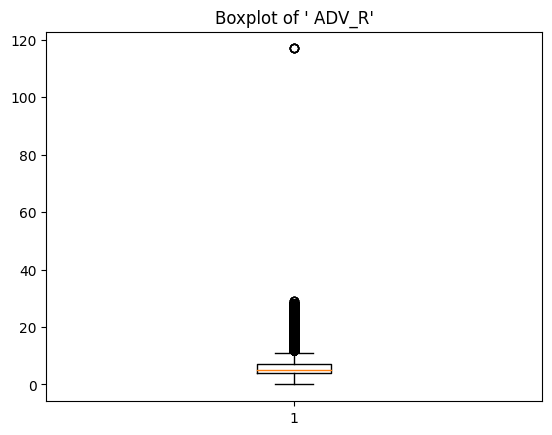

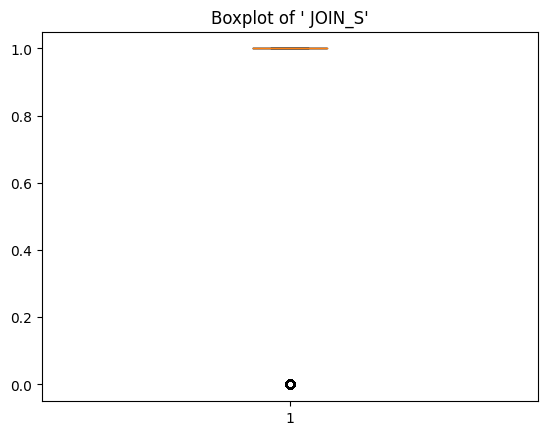

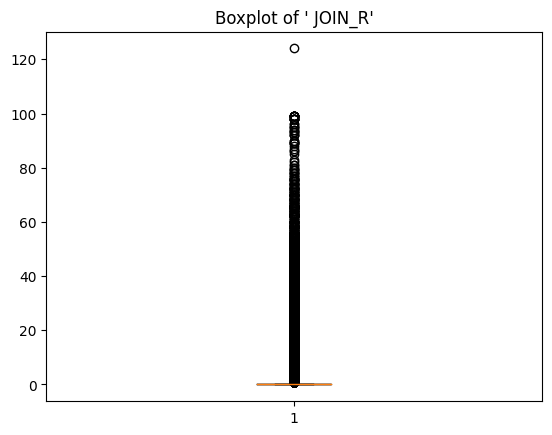

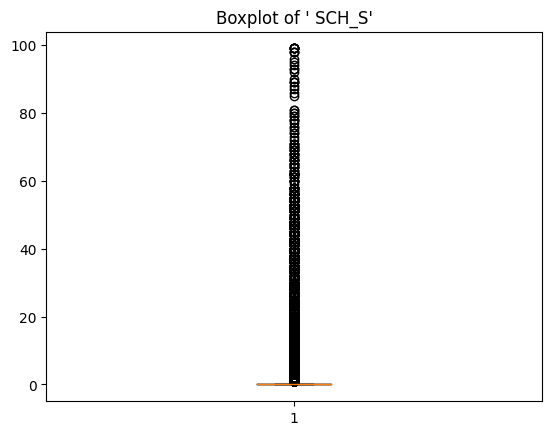

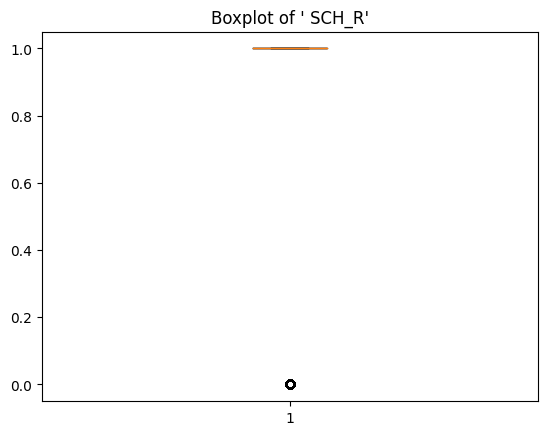

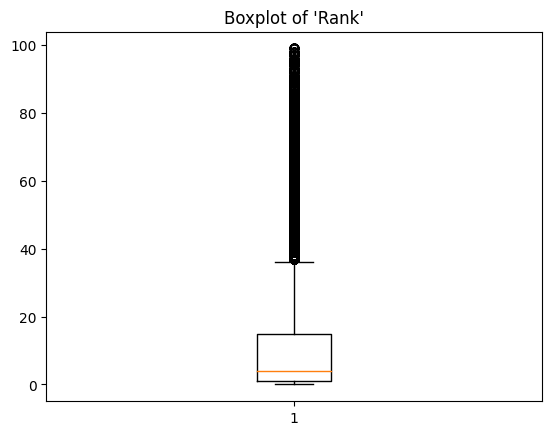

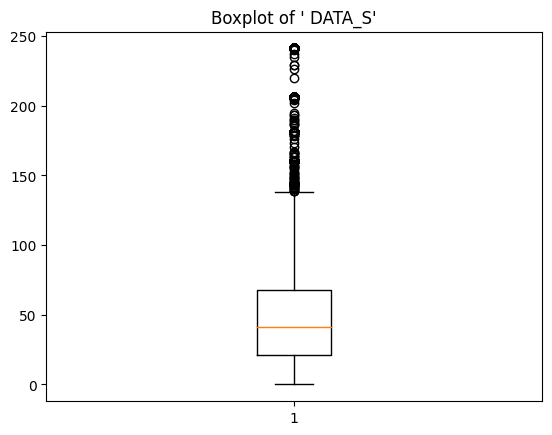

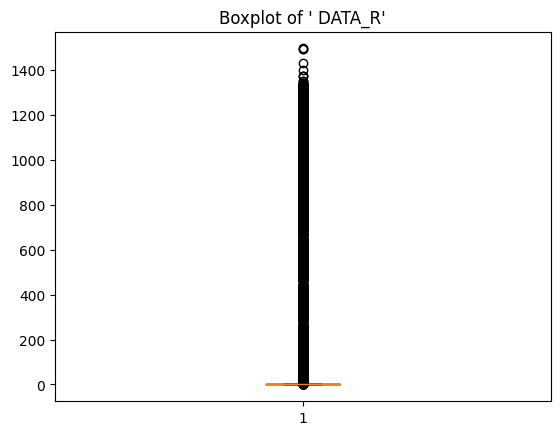

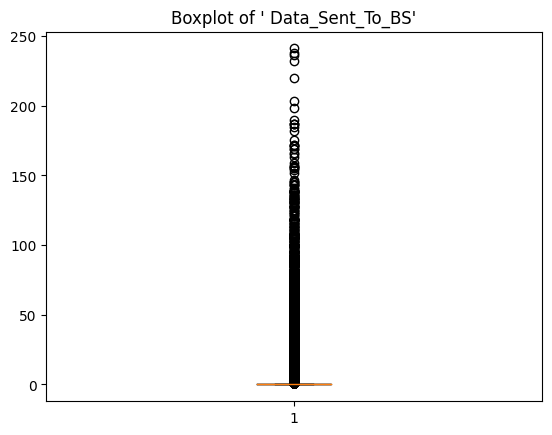

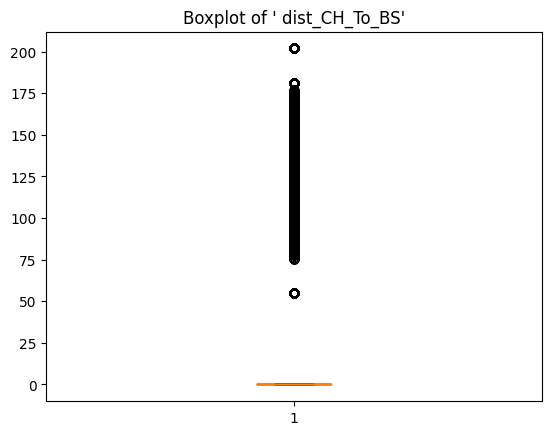

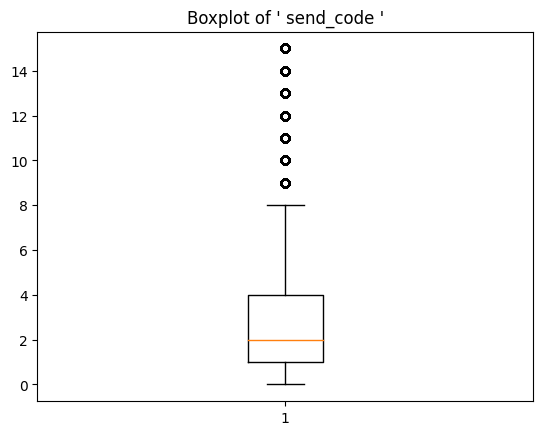

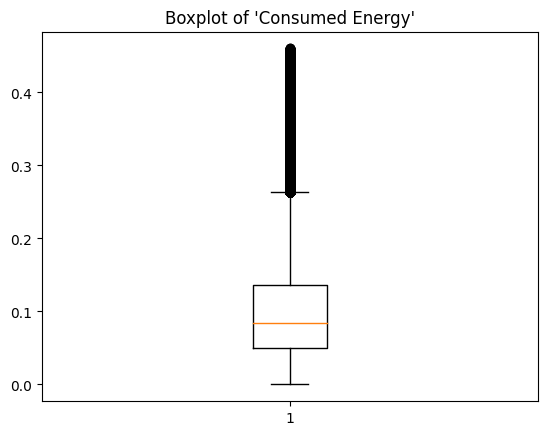

In [ ]:
# - Boxplots for numerical features
for col in dataset.select_dtypes(include=['int64', 'float64']):
    plt.boxplot(dataset[col])
    plt.title(f"Boxplot of '{col}'")
    plt.show()

## **Histogram**

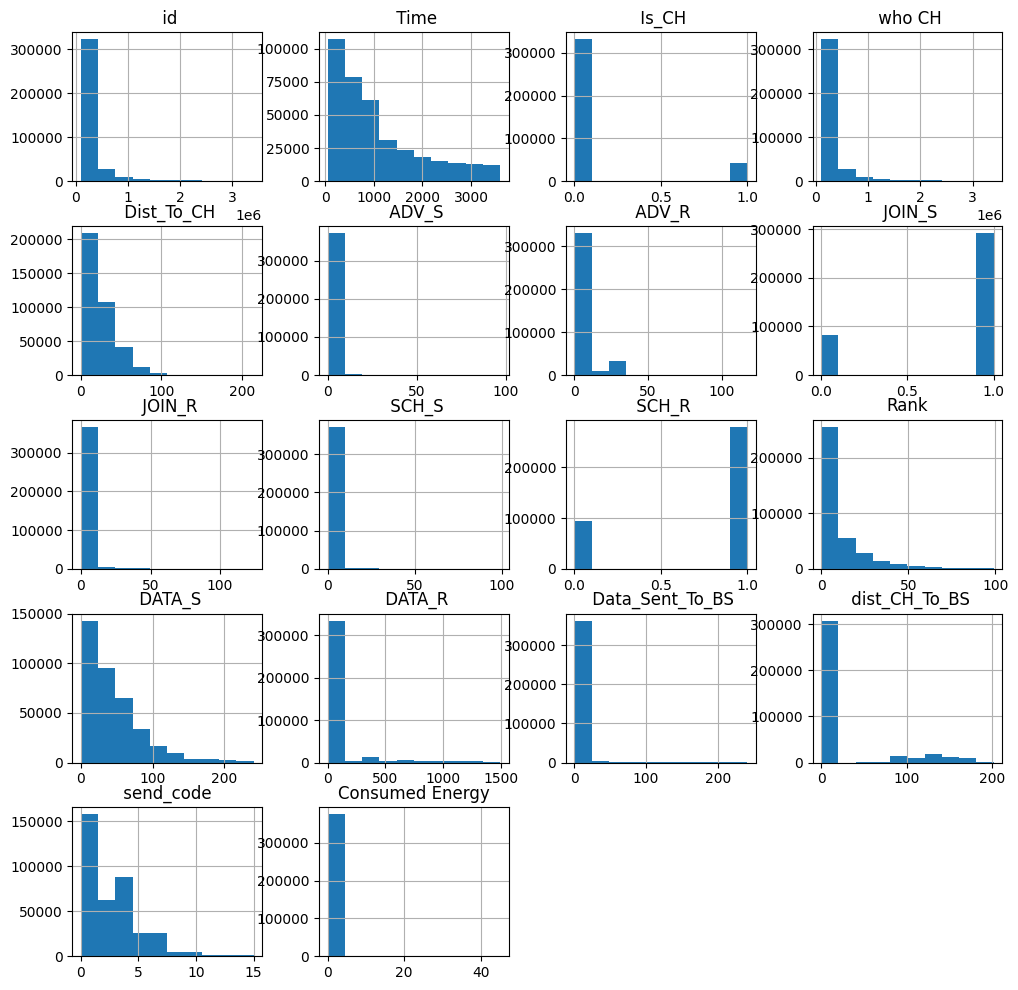

In [ ]:
dataset.hist(figsize=(12, 12))
plt.show()

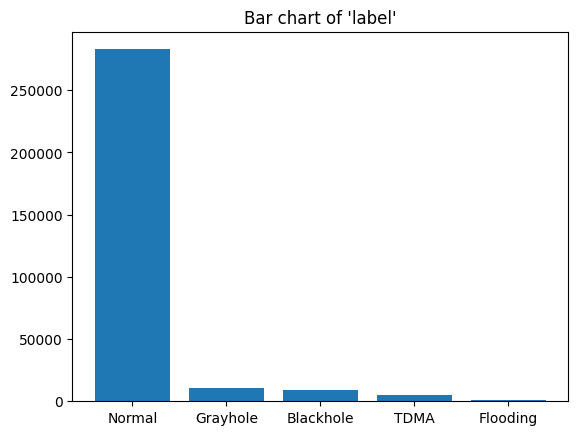

In [ ]:
for col in dataset.select_dtypes(include='object'):
    plt.bar(dataset[col].value_counts().index, dataset[col].value_counts())
    plt.title(f"Bar chart of '{col}'")
    plt.show()

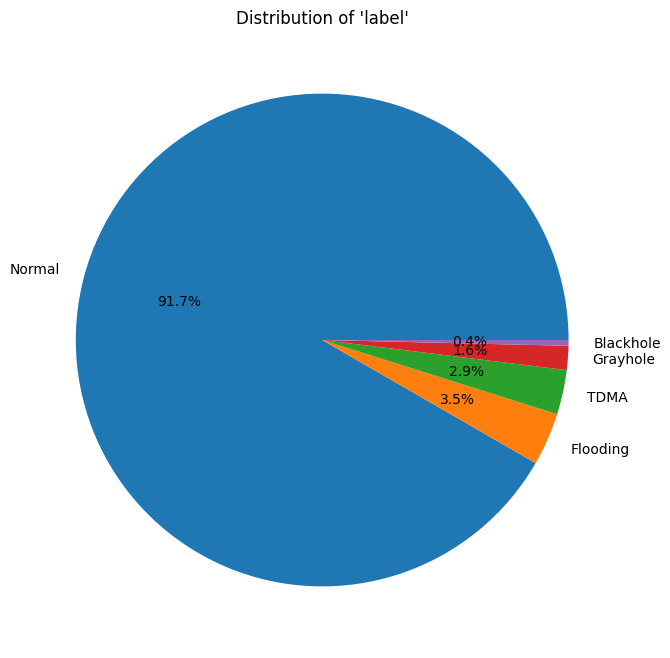

In [ ]:
# Pie charts for categorical features
for col in dataset.select_dtypes(include='object'):
    plt.figure(figsize=(10, 8))
    plt.pie(dataset[col].value_counts(), labels=dataset[col].unique(), autopct="%1.1f%%")
    plt.title(f"Distribution of '{col}'")
    plt.show()

# **Pair Plot**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WSN-DS.csv')

In [ ]:
# Select the 6 columns you want to plot
dataset_subset = dataset[['label', 'Consumed Energy', ' id', ' ADV_S']]


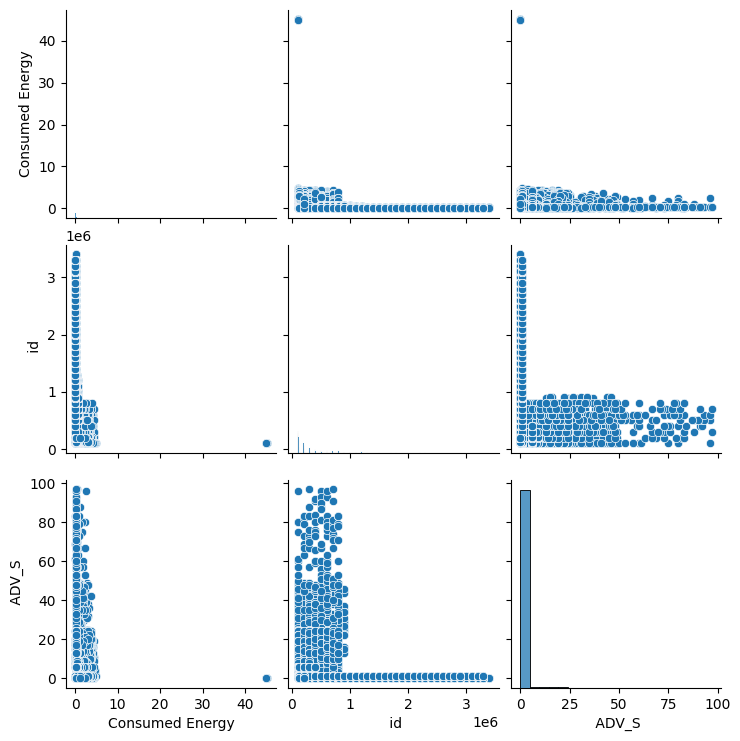

In [ ]:
# Create the pairplot
sns.pairplot(dataset_subset)

In [ ]:
numeric_cols = dataset.select_dtypes(include=['int64', 'float64']).columns

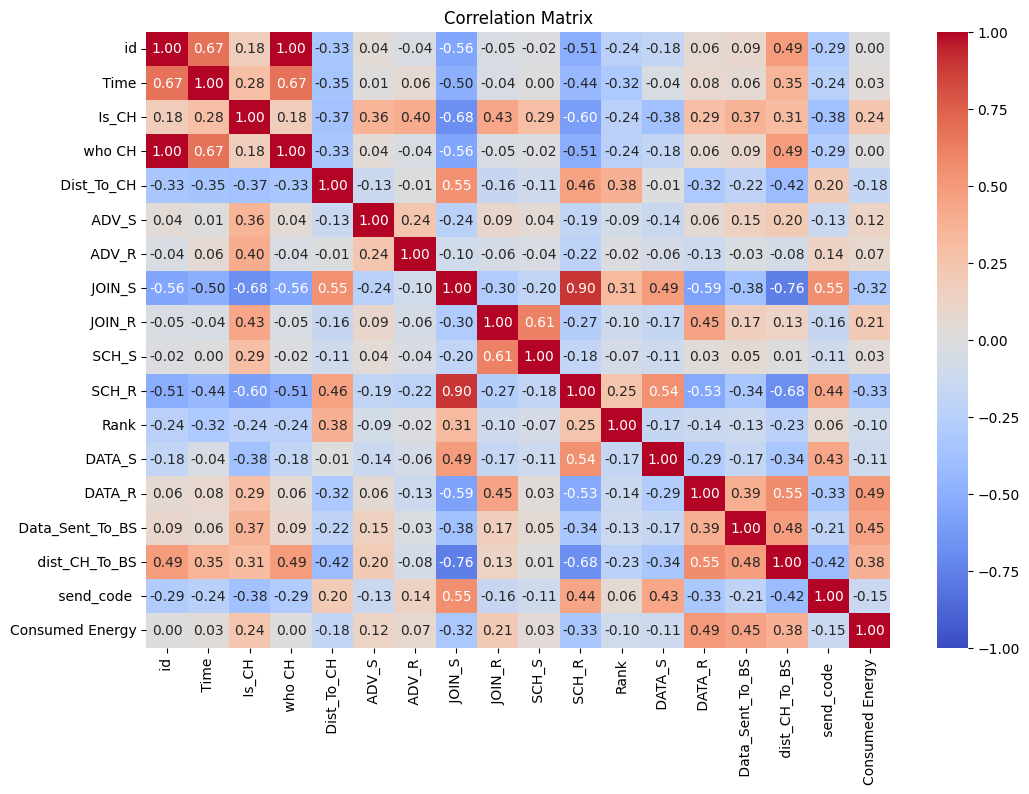

In [ ]:
# Compute correlation matrix
corr_matrix = dataset[numeric_cols].corr()
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


## **STEP # 03**

## **Extract relevant features**

In [ ]:
# Select features based on domain knowledge or statistical tests.
relevant_features = ['label', ' id', ' ADV_R']

# Extract the relevant features from the dataset.
X = dataset[relevant_features]

# Convert the string values in the 'label' column to numerical values.
X = pd.get_dummies(X, columns=['label'])

##**Perform dimensionality reduction**

In [ ]:
# Choose a dimensionality reduction technique (e.g., PCA, t-SNE).
from sklearn.decomposition import PCA

# Initialize the dimensionality reduction object.
pca = PCA(n_components=0.95)

# Fit the dimensionality reduction object to the data.
X_reduced = pca.fit_transform(X)

## **Prepare the dataset for model training**

In [ ]:
# Separate features and target.
features = dataset.drop('label', axis=1)
target = dataset['label']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the numerical features.
numerical_features = [' Time', ' Dist_To_CH', ' ADV_S', ' ADV_R', ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', ' dist_CH_To_BS']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Prepare the final training and testing sets.
X_train_prepared = X_train
X_test_prepared = X_test
y_train_prepared = y_train
y_test_prepared = y_test

## **STEP # 04**

## **Split the preprocessed dataset into training and testing sets**

In [ ]:
from sklearn.model_selection import train_test_split

# Change the variable name to match the variable that was actually defined in the previous code cell
X_train, X_test, y_train, y_test = train_test_split(X_train_prepared, y_train_prepared, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train_prepared:", y_train_prepared.shape)

Shape of X_train: (239782, 18)
Shape of y_train_prepared: (299728,)


## **Choose at least five classification algorithms**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialize the models
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier())
]

## **Implement and train the models**

In [ ]:
# Train each model
for name, model in models:
    model.fit(X_train, y_train)
    print(f"{name} trained.")

Naive Bayes trained.
Decision Tree trained.
SVM trained.
KNN trained.
Random Forest trained.


# **Optimize hyperparameters**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WSN-DS.csv')

In [ ]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [ ]:
 #Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

In [ ]:
param_grids = {
    'Decision Tree': {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
}

In [ ]:
# Perform hyperparameter tuning
for name, model in models.items():
    if name == 'Naive Bayes':
        continue

    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)


In [ ]:
print(f"Best parameters for {name}: {grid_search.best_params_}")


Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 10}


# **STEP # 05**

# **Ensemble Method: Random Forest (Bagging)**

#**Implementation and Training**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/WSN-DS.csv')

In [ ]:
X = dataset.drop('label', axis=1)
y = dataset['label']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth' : [3]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3)


In [ ]:
# Fit to training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3], 'n_estimators': [50, 100]})

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 3, 'n_estimators': 50}


# **Performance Comparison**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
}

In [ ]:
# Evaluate standalone classifiers
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")

Naive Bayes Accuracy: 0.8486914977379793
Decision Tree Accuracy: 0.9948353862784087
Random Forest Accuracy: 0.9969439365833478


In [ ]:
best_rf_model = models['Random Forest']
y_pred_rf = best_rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.9969439365833478


# **STEP #06**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc


In [ ]:
# Define the models dictionary if it doesn't exist
models = {
    "Random Forest": RandomForestClassifier()
    # Add other models as needed
}


In [ ]:
results = []
for name, model in models.items():  # Use .items() to iterate over key-value pairs
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

# **Classification Report**

In [ ]:
report = classification_report(y_test, y_pred)
print(f"Classification Report for {name}:\n{report}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

   Blackhole       0.99      0.99      0.99      2043
    Flooding       0.94      0.98      0.96       631
    Grayhole       0.99      0.98      0.99      2985
      Normal       1.00      1.00      1.00     67965
        TDMA       1.00      0.93      0.96      1309

    accuracy                           1.00     74933
   macro avg       0.98      0.98      0.98     74933
weighted avg       1.00      1.00      1.00     74933



# **Confusion Matrix**

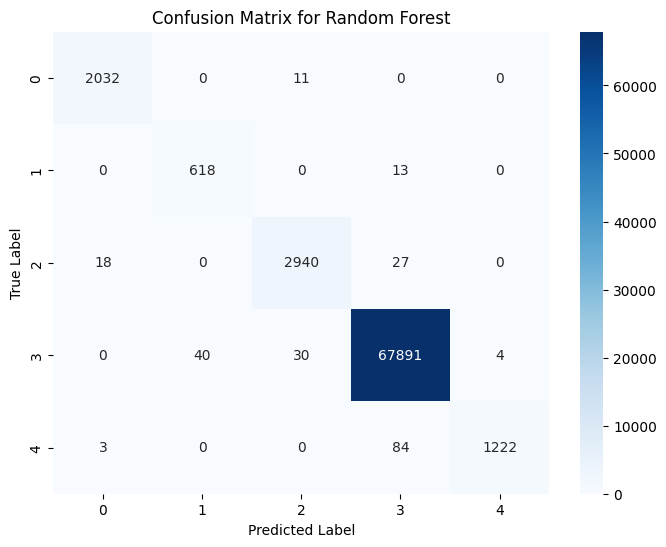

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for {name}")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **ROC-AUC**

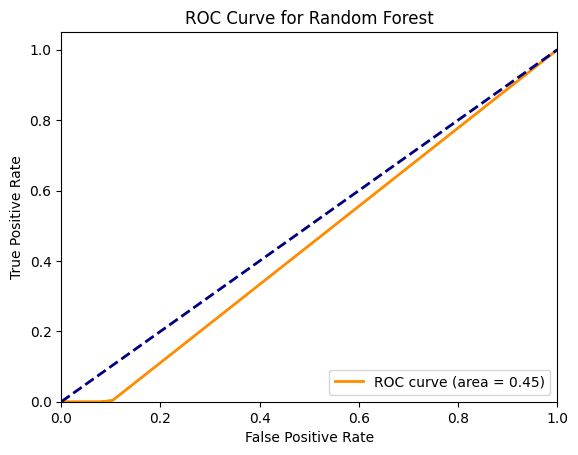

In [ ]:
# AUC-ROC Curve (if applicable)
if hasattr(model, "predict_proba"):
     y_prob = model.predict_proba(X_test)[:, 1]
     fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Normal')
     roc_auc = auc(fpr, tpr)
     plt.figure()
     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
     plt.xlim([0.0, 1.0])
     plt.ylim([0.0, 1.05])
     plt.xlabel('False Positive Rate')
     plt.ylabel('True Positive Rate')
     plt.title(f'ROC Curve for {name}')
     plt.legend(loc="lower right")
     plt.show()

# **Classification Report, model & confusion matrix Report**

In [ ]:
results.append((name, report, cm))

In [ ]:
for name, report, cm in results:
    print(f"Model: {name}")
    print(f"Classification Report:\n{report}")
    print(f"Confusion Matrix:\n{cm}\n")

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

   Blackhole       0.99      0.99      0.99      2043
    Flooding       0.94      0.98      0.96       631
    Grayhole       0.99      0.98      0.99      2985
      Normal       1.00      1.00      1.00     67965
        TDMA       1.00      0.93      0.96      1309

    accuracy                           1.00     74933
   macro avg       0.98      0.98      0.98     74933
weighted avg       1.00      1.00      1.00     74933

Confusion Matrix:
[[ 2032     0    11     0     0]
 [    0   618     0    13     0]
 [   18     0  2940    27     0]
 [    0    40    30 67891     4]
 [    3     0     0    84  1222]]



# **Dataset Summary after Analysis**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

In [ ]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
results.append([name, accuracy, precision, recall, f1])

In [ ]:
# Display results
results_dataset = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_dataset)

           Model  Accuracy  Precision    Recall  F1-Score
0  Random Forest  0.996904   0.996928  0.996904  0.996893


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Create a DataFrame with the results
results_data = {
    'Model': ['Random Forest'],
    'Accuracy': [0.996904],
    'Precision': [0.996928],
    'Recall': [0.996904],
    'F1-Score': [0.996893]
}
results_df = pd.DataFrame(results_data)

<Axes: xlabel='Model'>

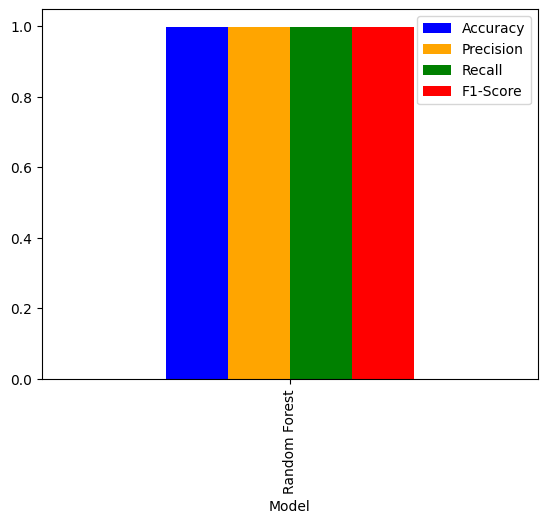

In [ ]:
# Plot the results
fig, ax = plt.subplots()
results_df.plot(kind='bar', x='Model', ax=ax, color=['blue', 'orange', 'green', 'red'])